In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings as war
from IPython.display import display

In [102]:
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=250,noise=0.1,random_state=12)

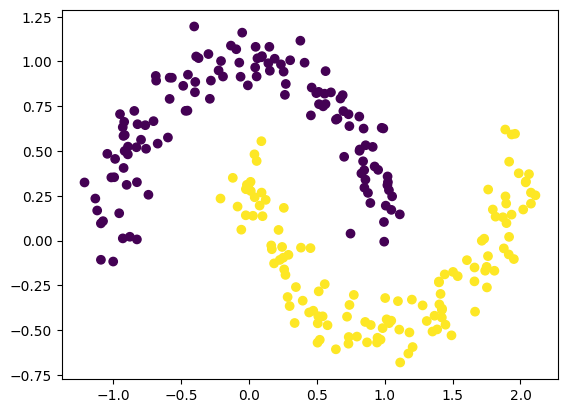

In [103]:
plt.scatter(X[:,0],X[:,1],c=y)

In [104]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3)
y_pred = dbscan.fit_predict(X)

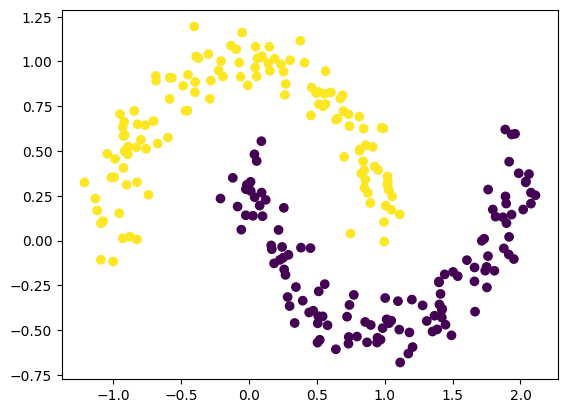

In [105]:
plt.scatter(X[:,0],X[:,1],c=dbscan.labels_)

# * Some Work on Customer Segmentation Problem*

In [106]:
df = pd.read_csv("/Users/satwikbiswas/Documents/Python/Data/Mall_Customers.csv")

In [107]:
display(df)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [108]:
df.rename(columns={"Annual Income (k$)":"Income","Spending Score (1-100)":"Score"},inplace=True)
df.drop("CustomerID",axis=1,inplace=True)

In [109]:
display(df)

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


#### Now trying to perfrom a a clustering based on income and spending score

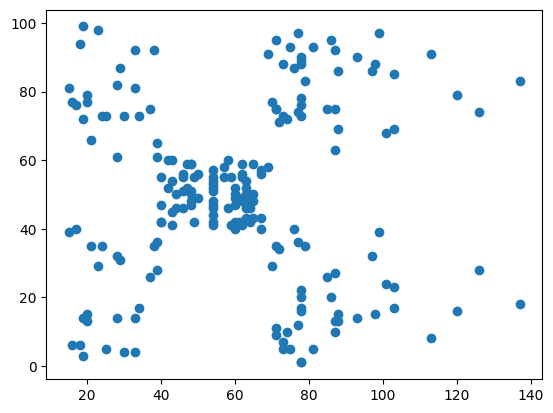

In [110]:
plt.scatter(df["Income"],df["Score"])

In [113]:
X=df[["Income","Score"]]
display(X)

,Income,Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


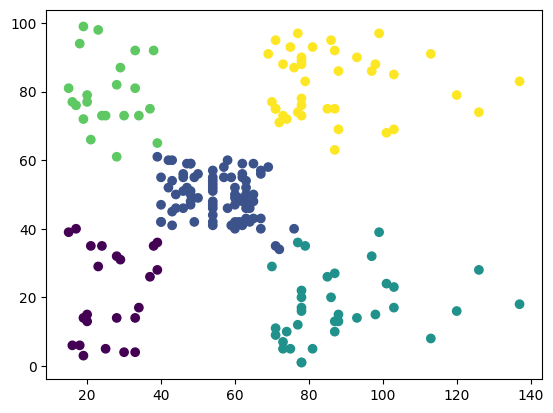

In [ ]:
from sklearn.cluster import KMeans

classifer = KMeans(
    n_clusters=5,
    init="k-means++",
    n_init=10,
    max_iter=100
)
classifer.fit(X)
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=classifer.labels_)


In [117]:
df_new = df
df_new["Catagories"] = classifer.labels_

display(df_new)

,Gender,Age,Income,Score,Catagories
0,Male,19,15,39,0
1,Male,21,15,81,3
2,Female,20,16,6,0
3,Female,23,16,77,3
4,Female,31,17,40,0
...,...,...,...,...,...
195,Female,35,120,79,4
196,Female,45,126,28,2
197,Male,32,126,74,4
198,Male,32,137,18,2


#### In the above we have converted the data into five clusters based on their Income and Salary now we can provide discounts to users based on these catagories

##### one of the issue is that k mean assign catagoty like 0,1,2 but does not tell which cataogry is which color to assign that we need to find the centroid and decide it by ourslef

In [119]:
print("Cluster Centroids:")
for i, centroid in enumerate(classifer.cluster_centers_):
    print(f"  Cluster {i}: {centroid}")


print("\nNote: The colors in the plot correspond to the cluster labels (0, 1, 2, etc.) based on matplotlib's default color cycle.")

Cluster Centroids:
  Cluster 0: [26.30434783 20.91304348]
  Cluster 1: [55.2962963  49.51851852]
  Cluster 2: [88.2        17.11428571]
  Cluster 3: [25.72727273 79.36363636]
  Cluster 4: [86.53846154 82.12820513]

Note: The colors in the plot correspond to the cluster labels (0, 1, 2, etc.) based on matplotlib's default color cycle.
